# Empezar a experimentar

1. clases de repuestas cortas con 3 palabras que ocurren más de n veces (k clases)
    1. contexto de turnos anteriores del otro usuario hasta encontrar respuesta del mismo usuario
        1. unigramas (que ocurren más de m veces)
            1. unigramas (que ocurren más de 10 veces)
            2. unigramas (que ocurren más de 20 veces)
        2. unigramas (que ocurren más de m veces) y bigramas (que ocurren más de p veces)
        3. unigramas (que ocurren más de m veces) y bigramas (que ocurren más de p veces) y subwords (que ocurren más de r veces)
        4. subwords (que ocuren más de r veces)
    2. contexto de 1 turno anterior
        1. unigramas (que ocurren más de m veces)
            1. unigramas (que ocurren más de 10 veces)
            2. unigramas (que ocurren más de 20 veces)
        2. unigramas (que ocurren más de m veces) y bigramas (que ocurren más de p veces)
        3. unigramas (que ocurren más de m veces) y bigramas (que ocurren más de p veces) y subwords (que ocurren más de r veces)
        4. subwords (que ocuren más de r veces)
    3. contexto de 3 turnos anteriores
        1. unigramas (que ocurren más de m veces)
            1. unigramas (que ocurren más de 10 veces)
            2. unigramas (que ocurren más de 20 veces)
        2. unigramas (que ocurren más de m veces) y bigramas (que ocurren más de p veces)
        3. unigramas (que ocurren más de m veces) y bigramas (que ocurren más de p veces) y subwords (que ocurren más de r veces)
        4. subwords (que ocuren más de r veces)
    4. contexto de 10 turnos anteriores
        1. unigramas (que ocurren más de m veces)
            1. unigramas (que ocurren más de 10 veces)
            2. unigramas (que ocurren más de 20 veces)
        2. unigramas (que ocurren más de m veces) y bigramas (que ocurren más de p veces)
        3. unigramas (que ocurren más de m veces) y bigramas (que ocurren más de p veces) y subwords (que ocurren más de r veces)
        4. subwords (que ocuren más de r veces)
2. clases de respuestas cortas con 2 palabras que ocurren más de n veces (k clases)
3. clases de respuestas cortas con 1 palabra que ocurren más de n veces (k clases)

como primera iteración, hacer experimentos con:
- unigramas y bigramas de palabras y trigramas de letras (incluyendo espacios en blanco) (subwords) que ocurren más de m, p y r veces en el contexto, respectivamente
- contexto de 1, 3 y 10 turnos anteriores
- clases de 2 y 1-3 palabras

Cada experimento hacerlo con SVM, Logistic Regression, Decision Trees, Naïve Bayes

    - seleccionar del corpus los ejemplos que cumplan con esa condición (que ocurran más de k veces en el corpus), junto con su contexto 
    - dividir los ejemplos en training, tuning y test
    - definir clases objetivo
           - todo el rango de respuestas cortas posibles que ocurren más de n veces (para diferentes valores de n)
     

- implementar el pipeline de clasificador y evaluación (en función de las clases)
- buscar un clasificador que ofrezca múltiples resultados (múltiples clases)

## Clases de respuestas cortas con 3 palabras que ocurren más de 10 veces

In [30]:
from sklearn import svm
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import pandas as pd
import csv

In [7]:
df = pd.read_csv('short_ans1.csv')

In [3]:
import pickle

filename = "BOG1.pickle"
with open(filename, 'rb') as f:
    X = pickle.load(f)

In [25]:
X.shape

(25719, 5323)

In [12]:
with open("y_short1.pickle", 'rb') as f:
    y = pickle.load(f)

In [13]:
from collections import Counter

Counter(y).most_common(20)

[('ja', 6139),
 ('ok', 1102),
 ('si', 831),
 ('no', 359),
 ('dale', 353),
 ('NUM', 214),
 ('ah', 187),
 ('nondef', 180),
 ('claro', 171),
 ('gracias', 160),
 ('aja', 156),
 ('yo', 150),
 ('😂😂😂', 142),
 ('😂😂😂😂', 141),
 ('👍🏻', 141),
 ('hola', 139),
 ('ok!', 131),
 ('sisi', 131),
 ('🤔', 129),
 ('se', 127)]

In [14]:
train, target, train_test, target_test = X[:2000], y[:2000], X[2001:2050], y[2001:2050]

In [32]:
tsne = TSNE(n_components=2, random_state=0)
matrix = tsne.fit_transform(train.toarray())

In [33]:
matrix[0]

array([ 22.4101181,  -2.3798151], dtype=float32)

In [38]:
points = pd.DataFrame(
    [
        (coords[0], coords[1])
        for coords in matrix
    ],
    columns=["x", "y"]
)

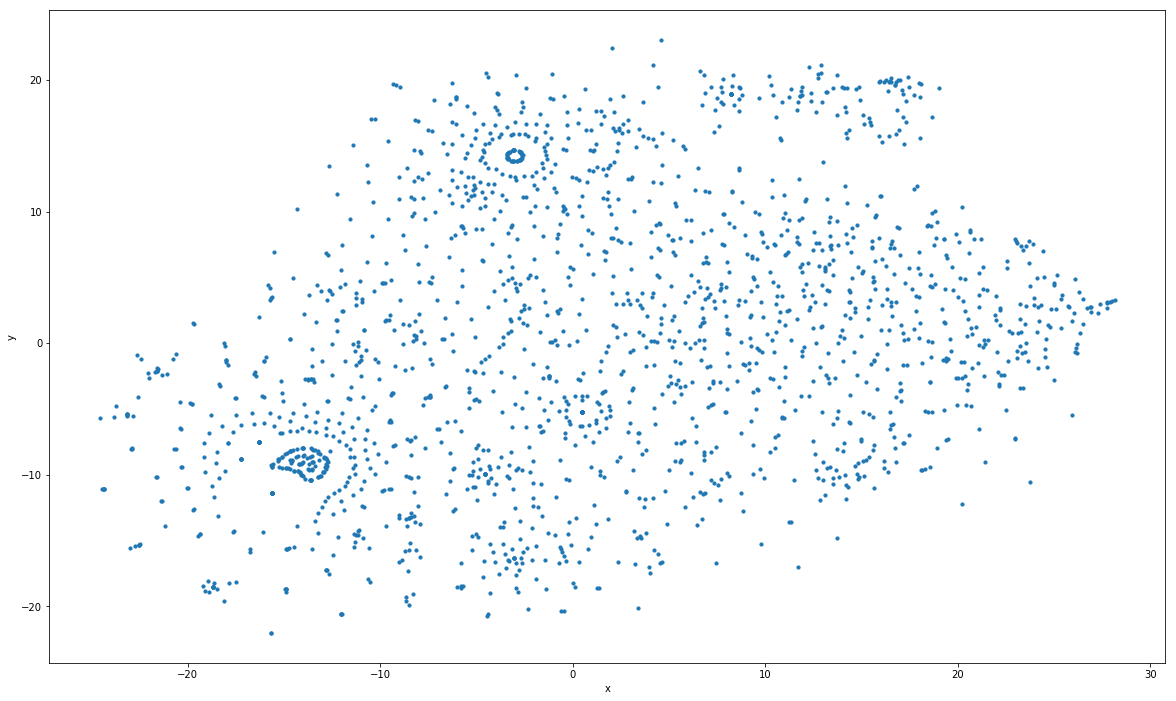

In [36]:
%matplotlib inline
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [27]:
(train.shape, len(target))

((2000, 5323), 2000)

In [20]:
clf = svm.SVC(kernel="rbf", C=100, gamma=100)
result = clf.fit(train, target)

In [21]:
predicted = result.predict(train_test)
predicted

array(['ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja',
       'chicos', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja',
       'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja',
       'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja',
       'ja', 'ja', 'ja', 'ja', 'ja', 'ja', 'ja'], dtype=object)

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(target_test, predicted)

0.16326530612244897